# Cборный проект №1

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Импортируем все необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.simplefilter('ignore')
import seaborn as sns

## Изучение данных из файла

Создадим фрейм с данными и познакомимся с датасетом.

In [2]:
df=pd.read_csv('D:\\DS\\Портфолио\\4-Проект\\games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Заголовки столбцов лучше изменить и привести к единому регистру. Будем делать это в разделе предобработки.
Давайте поищем еще что-то интересное:

In [3]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


Отлично, у нас нет аномльных значений в данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Недостатки в типах данных:**
    
-Year_of_Release - необходимо перевести в int

-User_Score - необходимо перевести в float

-Critic_Score - можно перевести в int. Так как нет дробных значений.

**Пропуски в данных:**

-Name - пропуск мог возникнуть по технической причине

-Year_of_Release - пропуск мог возникнуть по технической причине

-Genre - пропуск мог возникнуть по технической причине

-Critic_Score - Скорее всего игра просто не оценивалась критиками, в данных есть достаточно старые игры и раньше просто небыло единой системы ранжирования и принятых обществом авторитетных ресурсов и изданий ранжирования. Появлятся такие ресурсы стали намного позже чем выпускались игры, и они получили свое распространение только с развитием интернета. Так же непопулярные платформы и игры с не популярным жанром а так же не вызвавшие фурор могли так же не оцениваться критиками.

-User_Score - Причина схожая с Critic_score, только в отношении игроманов.

-Rating - А вот тут сложнее. Игру могли просто не отправлять на оценку.


Проверим дубликаты:

In [6]:
df.duplicated().sum()

0

Дубликатов нет - это хорошо!

Проверим, нет ли дубликатов по регистру в категориальных данных:

In [7]:
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

Дубликатов нет.

In [8]:
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

Дубликатов нет.

In [9]:
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

Взято от сюда: https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

EC - Early childhood - для детей младшего возраста (от 3ех лет)

E-Everyone - для всех (от 6ти лет)

K-A - Kids to Adults - то же что и E (Переименован в E  с 1998 года)

E10+ - Everyone 10 and older - Для всех от 10ти и старше.

T-Teen - подросткам (от 13ти лет)

M-Mature - для взрослых (от 17ти лет)

AO - Adults Only 18+ - (от 18ти лет)

RP - Rating Pending - Рейтинг ожидается



Дубликатов нет, но исходя из информации выше - мы можем заменить К-А на E, так как по сути это одно и то же.

Проверим уникальные значения:

In [10]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

У нас есть интересное значение tbd - to be decided - будет определено. Мы можем заменить это значенпие на nan

In [11]:
df['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Аномалий нет.

**Вывод:** 

Мы познакомились с данными теперь знаем, какую работу необходимо провести с данными, какие типы данных заменить, какие дубликаты убрать и т.п.

## Предобработка данных

Начнем с наименования столбцов, нам необходимо привести все к нижнему регистру. 

In [12]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Пропуски

У нас есть пропуски в следующих столбцах:

-Name - Просто выкинем их - 2 строчки на фоне всего фрейма не имеют большого веса

-Year_of_Release - оставим пропуски, так как исходя из задачи нам не сильно важно прогнозируем мы продажи на 2017 год или же 2027. Нам важно отработать принцип работы с данными.

-Genre - пропуска всего 2 познакомимся с ними и попробуем найти жанры этих игр.

-Critic_Score - Оставим пропуски так как заполнение будет не релевантным

-User_Score -  Оставим пропуски так как заполнение будет не релевантным

-Rating -  Оставим пропуски так как заполнение будет не релевантным

In [13]:
#Дропаем пропуски в столбце 'name'
df=df.dropna(subset=['name'])

In [14]:
#Проверяем
df.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Отлично - вместе с пропущенными именами ушли пропуски в жанрах, можем сделать вывод что жанры не были известны как раз по причине того, что не были известны названия игр.

Заменим tbd на NaN

In [15]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [16]:
#проверим
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

**Вывод:**

Мы убрали часть пропусков, оставшуюся часть пропусков релевантно мы заполнить не можем. Будем работать с тем, что есть. Приступим к изменениям типов данных.

### Типы данных

Давайте вспомним, что нам удалось обнаружить:

-Year_of_Release - необходимо перевести в int

-User_Score - необходимо перевести в float

-Critic_Score - можно перевести в int. Так как нет дробных значений.

Приступим:

In [17]:
df=df.astype({'year_of_release':'Int64','critic_score':'Int64','user_score':'float64'})

#проверим:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.6+ MB


**Вывод:**

Отлично, теперь у нас все в порядке с типами данных.

### Дубликаты

Мы выяснили, что рейтинг "К-А" переименовали в "Е", давайте заменим значения в таблице: 

In [18]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'

#проверим
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

**Вывод:**
Мы устранили имеющиеся дубликаты во фрейме.

### Рассчет суммарных продаж 

Для выполнения всех типов аналиха нам необходимы суммарные данные по продажам. Запишем их в столбце "sum_sales"

In [19]:
df['sum_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

#проверим
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


### Вывод

Мы выполнили предобработку данных: поработали с пустыми значениями, изменили типы данных, поработали с дубликатами и произвели необходимые вычисления. Можем приступать к анализу данных

В этой главе мы будем проводить исследовательский анализ данных. Изучим количество игр выпускаемых в разные годы, посмотрим как менялись продажи по платформам. Разберемся, какие платформы лидируют по продажам. Исследуем, как влияют на продажи отзывы пользователей и критиков, а так же исследуем жанры в игровой индустрии.

### Исследование количества игр выпускаемых в разные годы

Для исследования нам необходимо составить сводную таблицу по годам а затем построить график выпуска игр

In [20]:
#Создаем сводную таблицу
year_sum_sales=df.groupby('year_of_release').agg({'sum_sales':['count','sum']})

#Проверяем
year_sum_sales.tail().reset_index()

year_of_release sum_sales       
                      count    sum
0            2012       653 355.84
1            2013       544 361.24
2            2014       581 331.53
3            2015       606 267.98
4            2016       502 129.94

In [21]:
year_sum_sales.describe()

sum_sales       
          count    sum
count     37.00  37.00
mean     444.43 238.23
std      451.60 207.60
min        9.00  11.38
25%       36.00  49.37
50%      338.00 201.07
75%      762.00 361.24
max     1427.00 671.50

Text(0, 0.5, 'Количество')

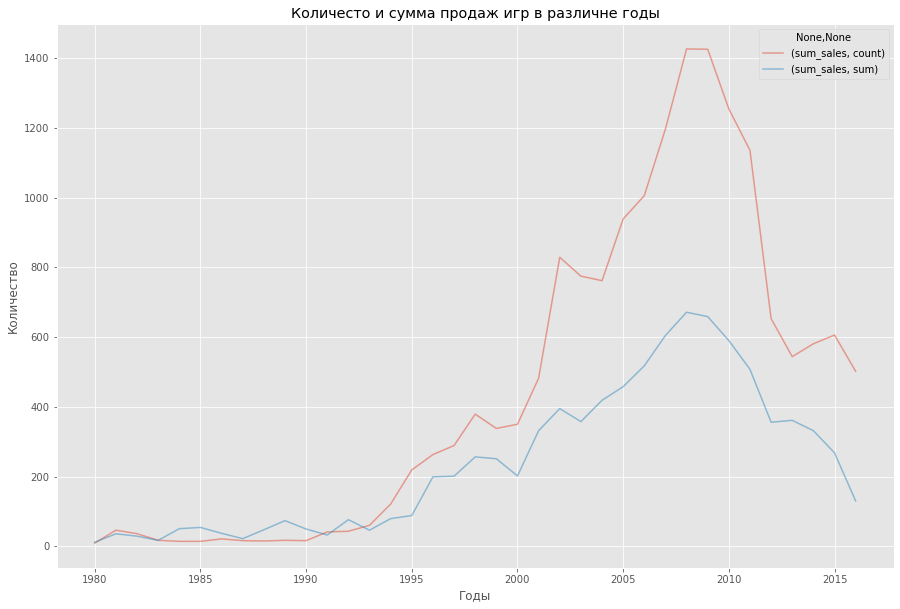

In [22]:
#Строим график:
# Добавим стиль.
plt.style.use('ggplot') 

year_sum_sales.plot(alpha=0.5, legend=True, figsize=(15,10))
plt.title('Количесто и сумма продаж игр в различне годы')
plt.xlabel('Годы')
plt.ylabel('Количество')

Наблюдаем интересную картниу: 

1) С 1980 по 1990 количесто выпускаемых игр почти не изменялось (есть совсем небольшой рост). Продажи в этот период изменялись волнообразно, и показали незначительный рост.

2) С 1993 года начинается активный рост количества выпускаемых игр и такой же стремительный рост продаж. Растущий тренд наблюдается до 2008-2009гг. В этот период мы так же видим незначительные сниженя, возможно связанные с сезонностью или же циклом производства игр.

3) С 2009 года наблюдается мощный спад количества выпускаемых игр и продаж.

Возможно такая картина связана с развитием индустрии. Очень часто новшества развиваются по похожему сценарию: появилось что-то новое, и сперва все относятся скептически. Затем тенденция набирает обороты и все начинают пользоваться новшеством. Появляются новые проекты, ответвления, индустрия получает развитие идет всплеск всего. И затем нормализация. Когда люди начали привыкать. Появляются понятные и прогнозируемые направления. Результаты различных экспериментов указали путь развития и все становится более размеренным.

Хочется убрать ранние периоды, когда индустрия только зарождалась и была не сильно интересна. для дальнейшего анализа я бы использовал данные с 1993 года. с момента когда начался рост. Но давайте попробуем посмотреть, на ящик и попробуем поискать что-то интересное



Text(0, 0.5, 'Год реализации')

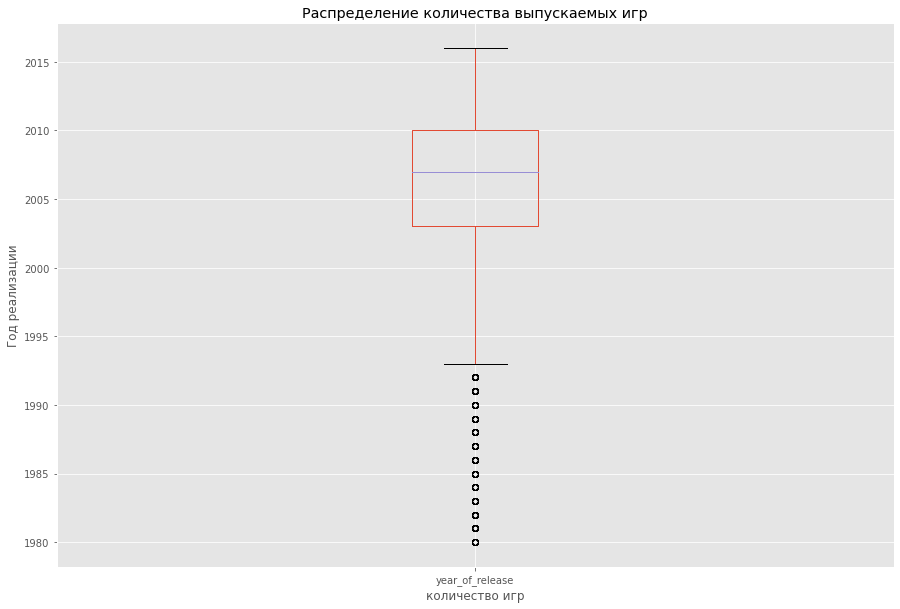

In [23]:
df.boxplot(column='year_of_release', figsize=(15,10))
plt.show
plt.title('Распределение количества выпускаемых игр')
plt.xlabel('количество игр')
plt.ylabel('Год реализации')

Как я и предполагал до 1993 года у нас выбросы. Смело можем убирать эти данные 

In [24]:
#Создаем отфильтрованнный фрейм
clear_df=df[df['year_of_release']>=1993]

#Проверяем
clear_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.50,E,29.80


**Вывод:**

Нам удалось уменьшить объем исследуемых данных. Теперь необходимо ознакомиться с платформами.

### Исследование продажи по платформам в разные годы. Актуальные платформы.

Для начала давайте определим за какой характерный срок появляются и исчезают платформы. Для этого нам необходимо создать фрейм со сгруппированными платформами и построить линейные графики динамики продаж.

In [25]:
pivot_platform_sales = clear_df.pivot_table(index=['year_of_release'], columns='platform', values='sum_sales', aggfunc='sum')
pivot_platform_sales

platform,3DO,3DS,DC,DS,GB,GBA,GC,GEN,N64,NES,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.65,NaN,3.61,...,NaN,1.50,40.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,0.02,NaN,NaN,NaN,12.18,NaN,NaN,8.13,NaN,0.11,...,3.65,0.36,35.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,0.08,NaN,NaN,NaN,3.60,NaN,NaN,NaN,NaN,NaN,...,11.57,NaN,32.20,0.16,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,36.03,NaN,NaN,NaN,34.10,NaN,...,7.69,NaN,15.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,6.37,NaN,NaN,NaN,39.50,NaN,...,6.77,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,3.38,NaN,26.90,NaN,NaN,NaN,49.24,NaN,...,3.82,NaN,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,5.16,NaN,38.00,NaN,NaN,NaN,57.87,NaN,...,0.09,NaN,0.26,NaN,0.46,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,5.99,NaN,19.76,0.07,NaN,NaN,33.97,NaN,...,NaN,NaN,NaN,NaN,0.68,NaN,NaN,NaN,0.99,NaN
2001,NaN,NaN,1.07,NaN,9.24,61.53,26.34,NaN,3.25,NaN,...,NaN,NaN,NaN,NaN,0.28,NaN,NaN,NaN,22.26,NaN


Отлично, теперь построим график

Text(0, 0.5, 'Количество продаж')

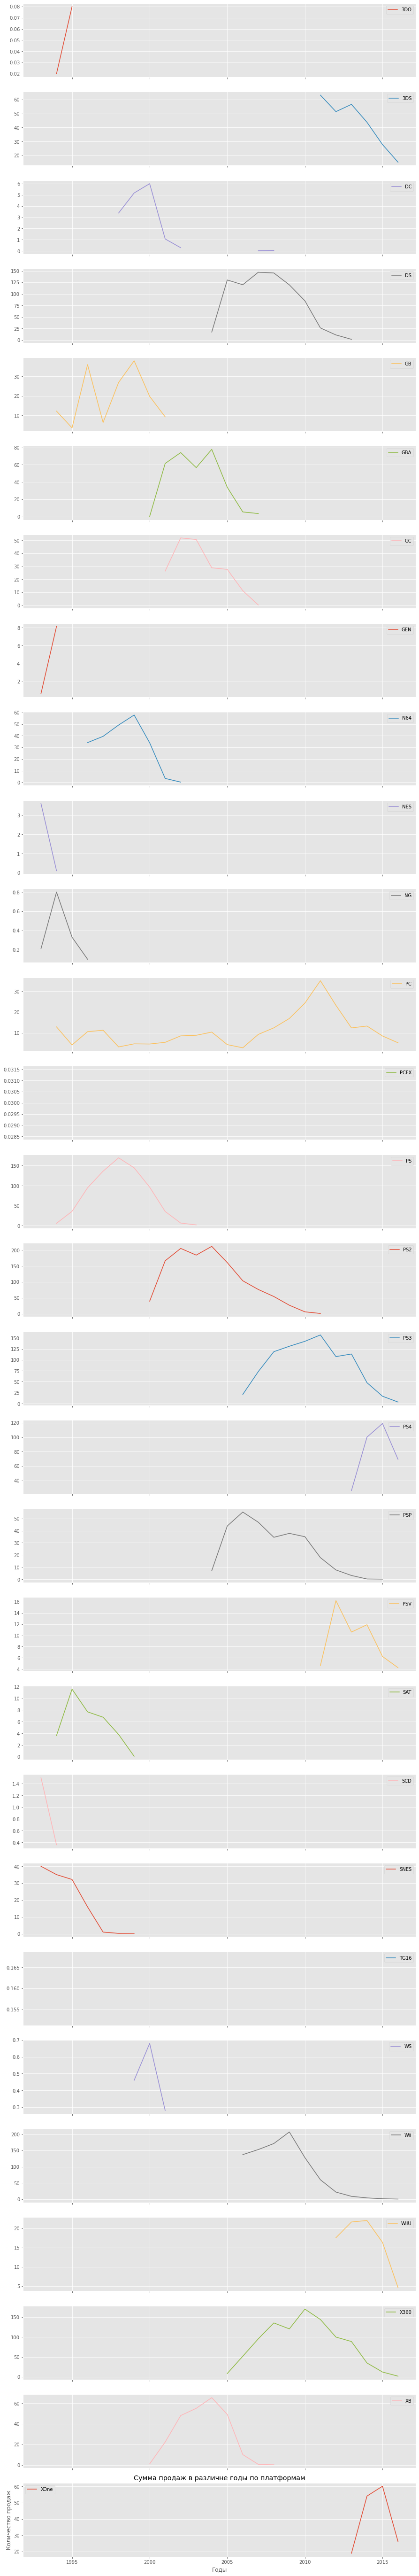

In [26]:
pivot_platform_sales.plot(subplots=True,figsize=(15,100))
plt.title('Сумма продаж в различне годы по платформам')
plt.xlabel('Годы')
plt.ylabel('Количество продаж')

Из графика и сводной таблицы можем сделать вывод, что цикл жизни платформы лежит на отрезке от 5ти до 10ти лет. Как правило производитель в этот период выпускает новую модель платформы и мы можем наблюдать затухание продаж на старой. Так же данный график и сводная таблица помогут нам в будущем определить актуальные и потенциально прибыльные платформы, но пока у нас недостаточно информации. Нам необходимо определить платформы с наибольшими суммарными продажами и посмотреть как они распределялись по годам.

In [27]:
top_5_sales_platform=clear_df.groupby(['platform']).agg({'sum_sales':'sum'}).sort_values(by='sum_sales', ascending=False).head()
top_5_sales_platform

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76


Очень интересная ситуация. Мы видим, что в лидерах по продажам у нас устаревающие модели на замену х360 уже вышел хOne. PlayStation уже имеется 4ое и 5ое поколение, а в лидерах продаж PS2. Продукты Nintendo так же находятся на спаде. Все логично. Модели существуют дольше на рынке, соответственно, на них было выпущено больше игр и период продаж намного больше, чем у актуальных платформ, ведь некоторые только-только появились на свет и еще набирают обороты.

Исходя из всего вышесказанного давайте определимся с актуальным периодом:

Будем использовать период до 4ех лет включительно, на графиках и в сводной таблице видно что после 5го года жизни плафтормы идет спад продаж. Нам лучше взять платформы находящиеся на пике и которые потенциально еще могут вырасти. Мы будем использовать платформы не старше 2013 года выпуска.


In [28]:
#Отфильтруем сводную таблицу по продажам и выбросим столбцы где есть хотя бы одно пустое значение
pivot_platform_sales=pivot_platform_sales.reset_index()
filtered_platforms=pivot_platform_sales[pivot_platform_sales['year_of_release']>=2013]
filtered_platforms.dropna(axis='columns', inplace=True)
filtered_platforms

platform,year_of_release,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
20,2013,56.57,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
21,2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
22,2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
23,2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


Text(0, 0.5, 'Количество продаж')

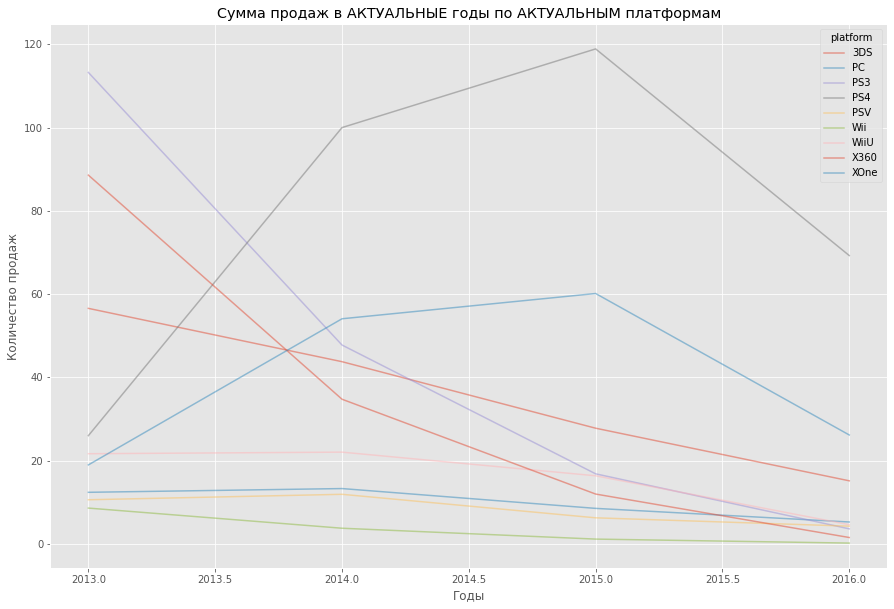

In [29]:
filtered_platforms.plot(
    x='year_of_release',
    alpha=0.5, 
    legend=True,
    figsize=(15,10))            
plt.title('Сумма продаж в АКТУАЛЬНЫЕ годы по АКТУАЛЬНЫМ платформам')
plt.xlabel('Годы')
plt.ylabel('Количество продаж')

Из графика и таблицы видно, что все платформы находятся на спаде. Давайте оставим только те платформы у которых за 2016 год продажи превышали 4.  Актуальные платформы: 3DS, PC, PS4, PSV, WiiU, XOne.

Создадим актуальный фрейм с нужным периодом и платформами:

In [30]:
actual_df=clear_df[
    (clear_df['year_of_release']>=2013)
    & (clear_df['platform']=='3DS')
    | (clear_df['platform']=='PC')
    | (clear_df['platform']=='PS4')
    | (clear_df['platform']=='PSV')
    | (clear_df['platform']=='WiiU')
    | (clear_df['platform']=='XOne')]
#Проверяем
actual_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.30,E,8.58


**Вывод:**

Мы выяснили, что срок жизни платформы от 5 до 10ти лет. В разные годы выпускалось разное количество игр. Пик пришелся на 2008-2009 год, когда максимальное количество выпускаемых игр превысило 1400 (максимум 1427) игр за год. Самое большое количество продаж имеют устаревающие (устаревшие) платформы, так как они существуют давно и имеется большое количетсво выпущенных игр на них. Мы не моежм ориентироваться на эти данные так как большинство этих платформ находтся на спаде или имют около нулевые продажи. Нам важно ориентироваться на актуальные платформы не старше 2013 года выпуска, и которые находятся на росте или пике продаж. Мы выбрали 3DS, PC, PS4, PSV,WiiU, XOne. Эти платформы являются актуальными лидерами продаж и в ближайшее время не потеряют своей актуальности. Мы создали фрейм с последними актуальными данным и теперь можем приступать к анализу игр.

### Исследование игр.

В данном разделе мы будем анализировать игры. Рассмотрим продажи в разбивке по платформам. Выясним как влияют отзывы пользоватлей и критиков на продажи. Соотнесем выводы с продажами на менее популярных платформах. Рассмотрим распределение игр по жанрам выясним какие самы прибыльные и поймем выделяются ли жанры с высокими и низкими продажами.

#### Глобальные продажи игр в разбивке по платформам.

Построим "ящик с усами" в разбивке по платформам:

<function matplotlib.pyplot.show(close=None, block=None)>

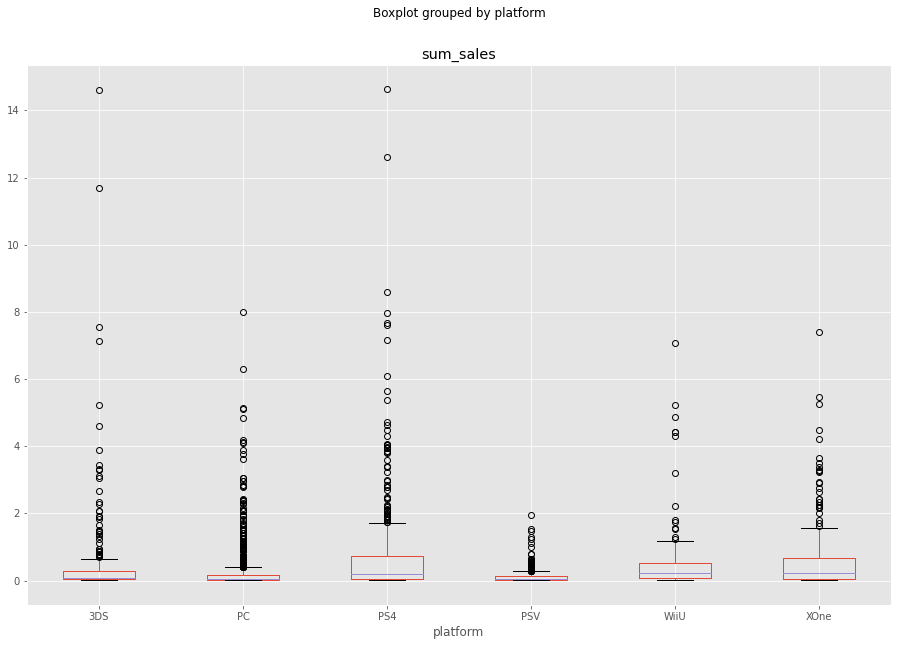

In [31]:
actual_df.boxplot('sum_sales', by='platform', figsize=(15,10))
plt.show

**Вывод:**
Мы видим большое количество выбросов на каждой платформе, скорее всего это связано с популярностью некоторых игр. Количество продажи которых сильно выше "проходных" игр.

#### Зависимость продаж от отзывов критиков и игроков

Проверим как влияют на продажи внутри одной популярной платформы (например PS4) отзывы пользователей и критиков.
Построим матрицу корреляции:

Text(0.5, 1.0, 'Correlation Heatmap PS4')

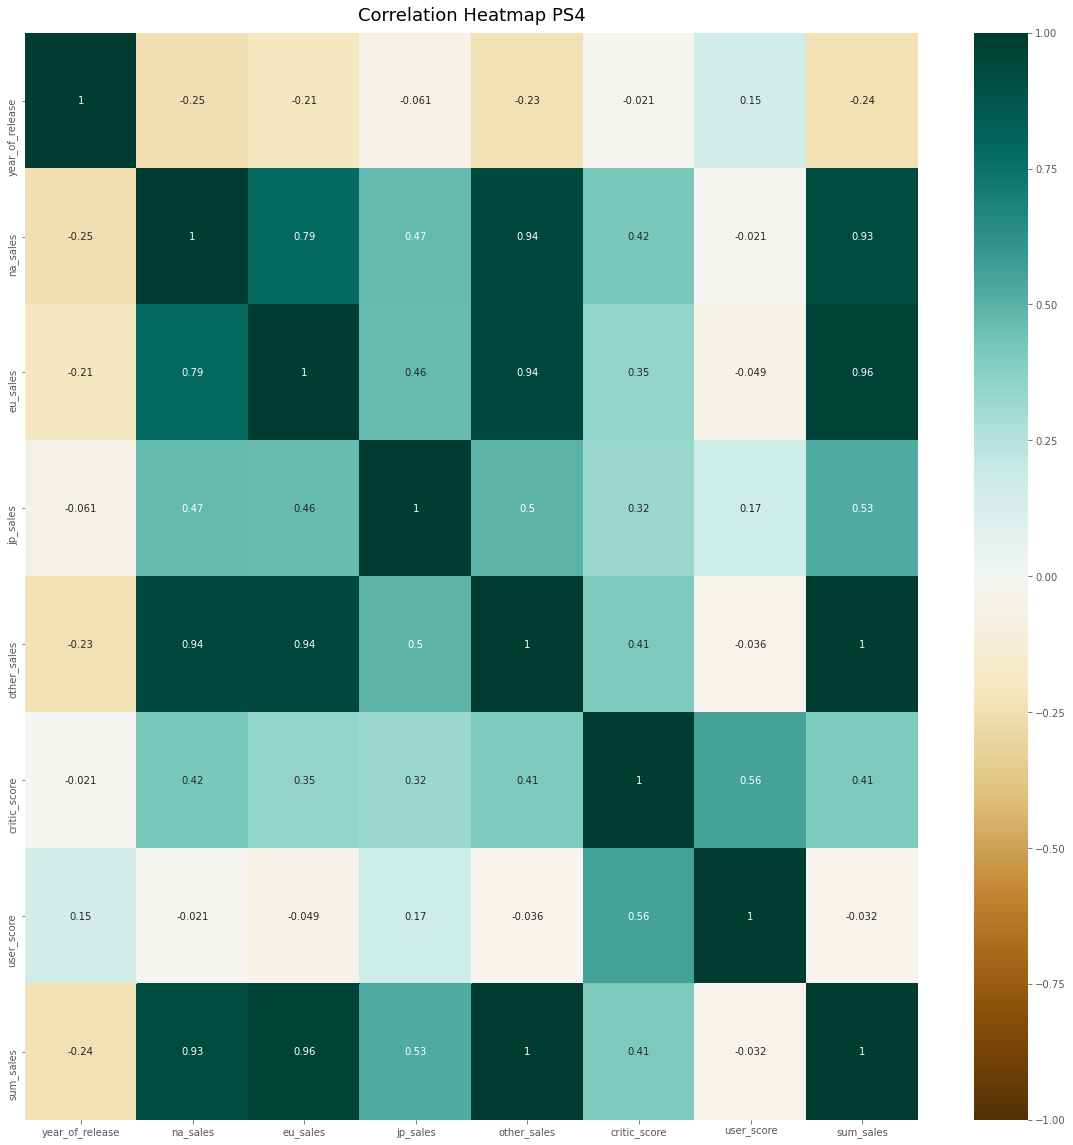

In [32]:
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(actual_df[actual_df['platform']=='PS4'].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap PS4', fontdict={'fontsize':18}, pad=12)

Так же для наглядности построим диаграммы:

Text(0.5, 1.0, 'Диаграмма рассеяния оценки игроков и суммарных продаж')

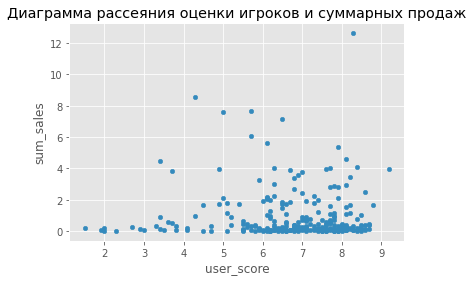

In [33]:
#Диаграмма рассеяния оценки игроков и суммарных продаж:
actual_df[actual_df['platform']=='PS4'].plot(x='user_score', y='sum_sales', kind='scatter')
plt.title('Диаграмма рассеяния оценки игроков и суммарных продаж')

Исходя из таблицы и диаграммы рассеяния мы видим что коэф. корреляции между оценками пользователей и продажами -0.03. Это означает, что зависимости почти нет, а знак минус может говорить об обратной корреляции (хоть и почти нулевой)

Text(0.5, 1.0, 'Диаграмма рассеяния оценки критиков и суммарных продаж')

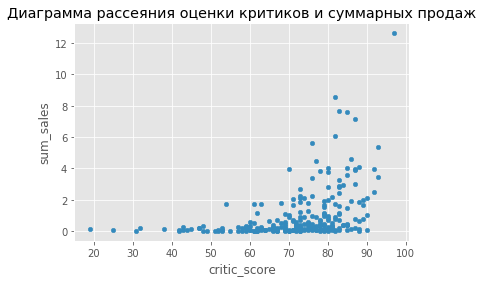

In [34]:
#Диаграмма рассеяния оценки критиков и суммарных продаж:
actual_df[actual_df['platform']=='PS4'].plot(x='critic_score', y='sum_sales', kind='scatter')
plt.title('Диаграмма рассеяния оценки критиков и суммарных продаж')

Зависимость продаж от оценки критиков выражена более ярко, это наглядно видно на диаграмме, а так же нам об этом говорит коэф.корреляции 0.41.

Text(0.5, 1.0, 'Диаграмма рассеяния оценки критиков и оценки игроков')

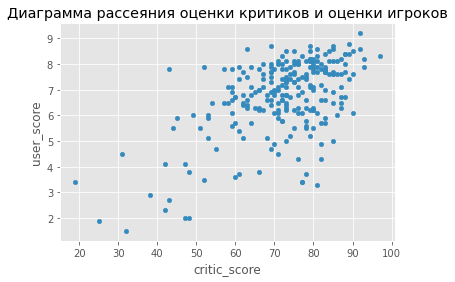

In [35]:
#Диаграмма рассеяния оценки критиков и оценки игроков:
actual_df[actual_df['platform']=='PS4'].plot(x='critic_score', y='user_score', kind='scatter')
plt.title('Диаграмма рассеяния оценки критиков и оценки игроков')

Интересно, что оценки игроков коррелируют с оценками критиков, и коэф. корреляции 0.56. Но при этом высокие оценки игроков слабже коррелируют с продажами. Возможно есть еще какой-то фактор вляющий на продажи.

Давайте посмотрим как дела обстоят на других популярных платформах:
Построим матрицу корреляции:

Text(0.5, 1.0, 'Correlation Heatmap (other platforms)')

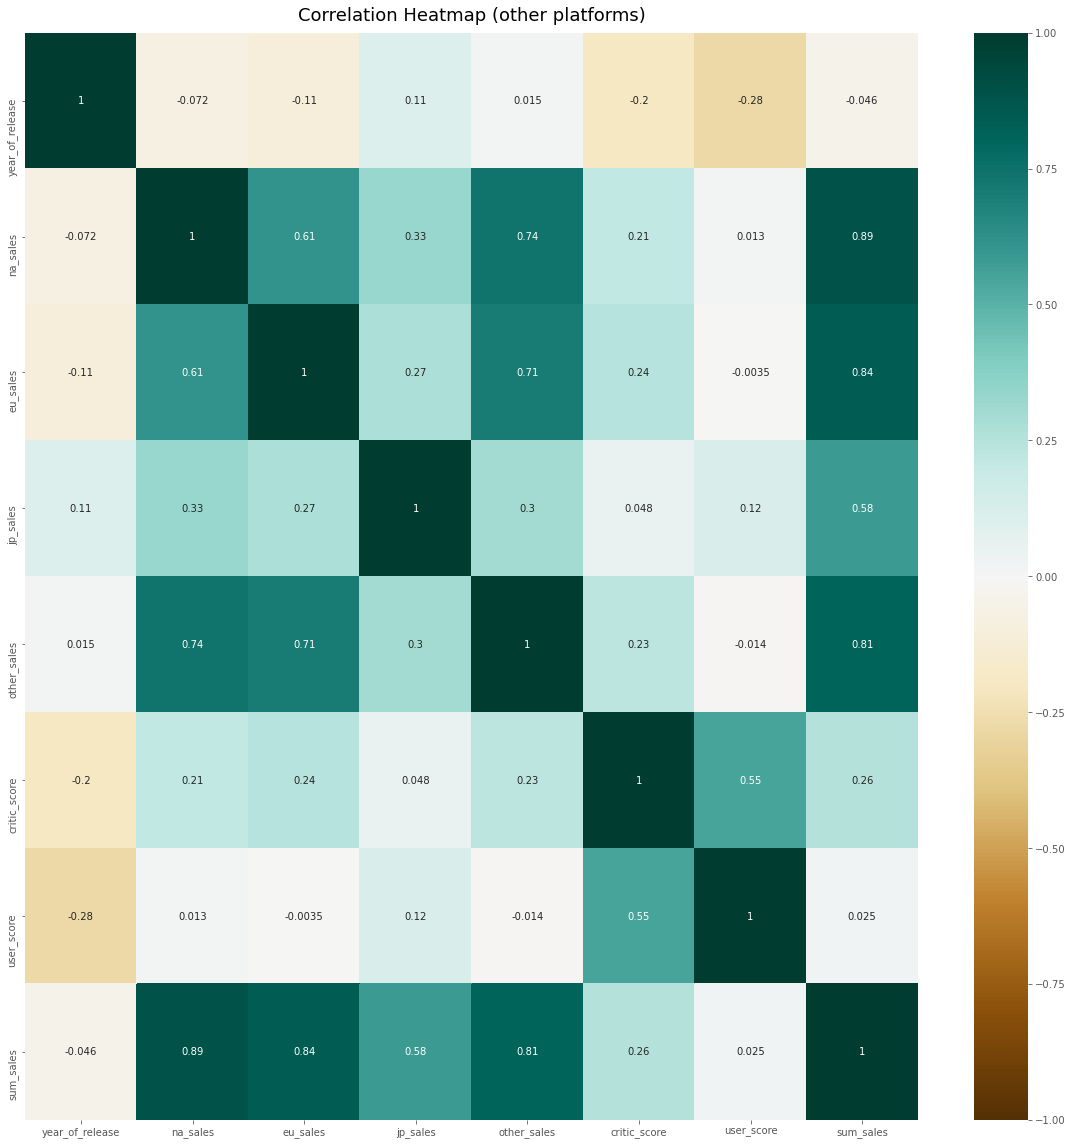

In [36]:
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(actual_df[actual_df['platform']!='PS4'].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap (other platforms)', fontdict={'fontsize':18}, pad=12)

Интересно, что коэф. корреляции между оценкой критиков и суммарными продажами снизился. (0.26 против 0.41 на PS4). А коэф. корреляции игроков наоборот чуть вырос (0.02 проти -0.03 на PS4), хоть и остался около нулевым. А корреляция между оценками игроков и критиков почти не изменилась (0.55 против 0.56 на PS4).

**Вывод:**

Оценки критиков имеют более значимое влияние на суммарные продажи нежели оценки игроков. Такая зависимость наблюдается на всех популярных платформах. Но зависимость разнится от платформы к платформе. Для успеха рекламной компании необходимо следить за предварительной оценкой критиков выходящих продуктов, а так же на выставках и предпоказах.

#### Исследование жанров игр.

В исследовании мы будем анализировать актуальные данные. Так как в индустрии есть "вымирающие" или уже "мертвые" жанры. 
Для исследования жанров составим сводную таблицу по жанрам:

In [37]:
genres_pivot_table=actual_df.pivot_table(index=['year_of_release'], columns='genre', values='sum_sales', aggfunc='sum')

genres_pivot_table.describe()

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,20.00,16.00,8.00,15.00,10.00,11.00,15.00,19.00,18.00,18.00,15.00,23.00
mean,11.71,1.60,3.54,3.20,4.20,0.38,2.41,8.91,11.26,3.45,6.90,2.15
std,21.94,1.81,4.63,4.44,5.56,0.49,4.00,12.72,18.31,2.64,10.52,1.78
min,0.03,0.01,0.01,0.02,0.01,0.01,0.01,0.03,0.02,0.06,0.03,0.28
25%,0.11,0.04,0.31,0.06,0.04,0.04,0.11,0.38,0.54,1.51,0.12,0.95
50%,1.03,0.89,1.62,1.94,1.75,0.11,0.31,3.44,2.82,3.20,1.55,1.83
75%,9.52,2.87,5.01,4.28,6.83,0.67,2.83,10.34,9.11,5.07,8.02,2.60
max,75.40,6.04,13.27,14.67,17.08,1.45,14.13,37.46,62.71,9.02,30.71,8.24


Text(0, 0.5, 'Количество продаж')

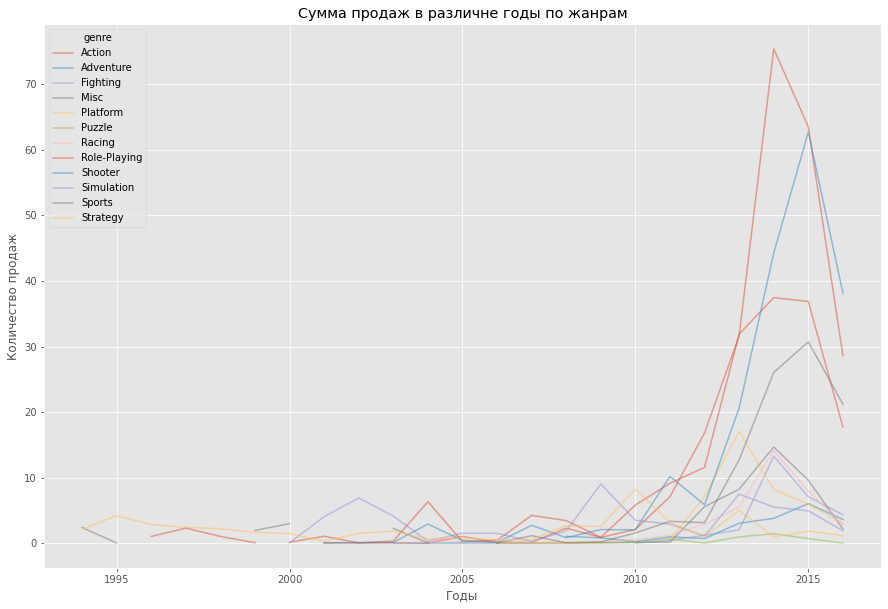

In [38]:
#Построим график
genres_pivot_table.plot(
    alpha=0.5, 
    legend=True,
    figsize=(15,10))
plt.title('Сумма продаж в различне годы по жанрам')
plt.xlabel('Годы')
plt.ylabel('Количество продаж')

Из графика мы видим, что некоторые жанры ощутимо лучше продаются нежели другие, а именно:

1) Action

2) Shooter

3) Role-playing

4) Sports

5) Strategy

6) Adventure

Давайте посмотрим как распределяются игры по жанрам:

In [39]:
pivot_genres=actual_df.pivot_table(index='genre', values='sum_sales', aggfunc=['count', 'mean'])
pivot_genres.info()
pivot_genres

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Action to Strategy
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (count, sum_sales)  12 non-null     int64  
 1   (mean, sum_sales)   12 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 288.0+ bytes


,count,mean
,sum_sales,sum_sales
genre,,
Action,724,0.32
Adventure,229,0.11
Fighting,58,0.49
Misc,139,0.35
Platform,69,0.61
Puzzle,42,0.10
Racing,111,0.33
Role-Playing,322,0.53


Text(0, 0.5, 'Количество')

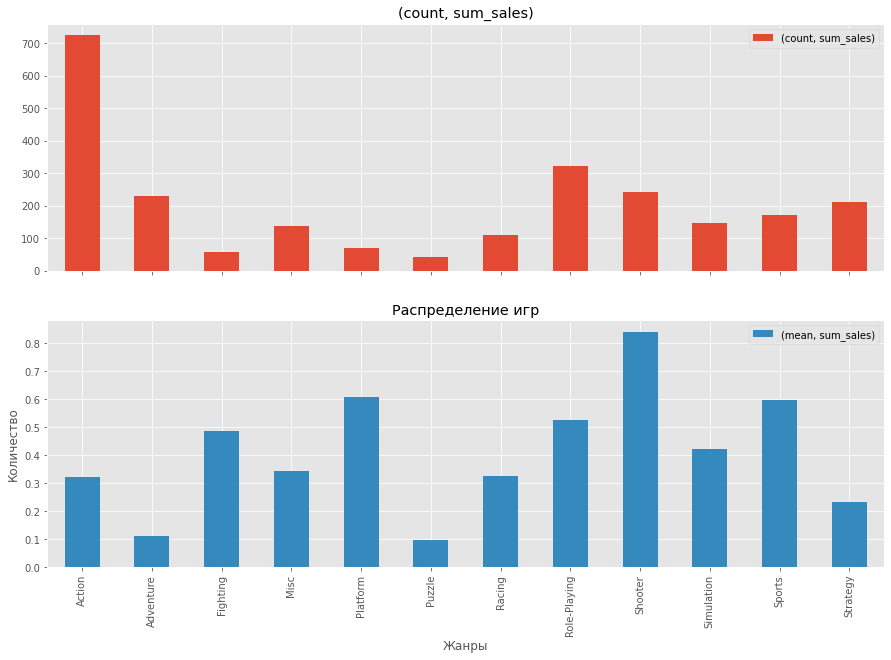

In [40]:
pivot_genres.plot.bar(figsize=(15,10), subplots=True)
plt.title('Распределение игр')
plt.xlabel('Жанры')
plt.ylabel('Количество')

Как мы видим, количество игр коррелирует с количеством продаж. Но если оценивать средние значения продаж, картина немного меняется, а именно - шутеры лиируют, платформеры и спортивные игры делят второе и третье место, затем идут роли-плэи и файтинги.

### Вывод

Мы исследовали данные по продажам, платформам и жанрам. Можем сделать следующий вывод:

Нам важно ориентироваться на актуальные платформы не старше 2013 года выпуска, и которые находятся на росте или пике продаж. Мы выбрали 3DS, PC, PS4, PSV,WiiU, XOne. Эти платформы являются актуальными лидерами продаж и в ближайшее время не потеряют своей актуальности

Оценки критиков имеют более значимое влияние на суммарные продажи нежели оценки игроков. Такая зависимость наблюдается на всех популярных платформах. Но зависимость разнится от платформы к платформе. Для успеха рекламной компании необходимо следить за предварительной оценкой критиков выходящих продуктов, а так же на выставках и предпоказах.

**Самые популярные и продаваемы жанры:** 

1) Action

2) Shooter

3) Role-playing

4) Sports

5) Strategy

6) Adventure

Рекламны бюджет следует направить на данные жанры.

**Самые не популярные:** 

1) Puzzle

2) Fighting

3) Platform

В данные игры лучше не вкладывать рекламный бюджет или вкладывать, но минимальное количество.

## Определение портрета пользователся каждого региона.

В Этой главе мы будем исследовать пользователей в каждом регионе (NA, EU, JP). Мы должны выявить топ-5 популярных платформ в каждом регионе. Определить самые популярные жанры, и определить влияет ли рейтинг ESRB на продажи в отдельном регионе.

Начнем с NA.

### North America

#### Определяем топ-5 платформ

Определим Топ 5 платформ в данном регионе:

In [41]:
NA_platform_pivot_table=(actual_df.groupby('platform').agg({'na_sales':'sum'})#Создаем сводную таблицу
                        .reset_index()#Сбрасываем индексы
                        .sort_values(by='na_sales', ascending=False)#Сортируем
                        )

#Проверяем
NA_platform_pivot_table.head()

,platform,na_sales
2,PS4,108.74
5,XOne,93.12
1,PC,92.08
0,3DS,38.20
4,WiiU,38.10


Отлично, мы видим топ 5 популярных платформ. Давайте рассчитаем доли продаж для каждой платформы, для этого напишем функцию:

In [42]:
def part(row):
    '''
    Вычисляет долю продаж платформы
    ======================================
    
    Аргументы:
                    row (object): Строка датафрейма.
                   

    Возвращает:
                    part (float): Доля продаж платформы в регионе.
    '''
    all_sales=sum(NA_platform_pivot_table['na_sales'])#Сумма продаж повсему столбцу
    platform_sales=row['na_sales']#Количество проданных копий по платформе
    
    part=(platform_sales*100)/all_sales
    
    return part


print('Строка документации: \n', part.__doc__)

Строка документации: 
 
    Вычисляет долю продаж платформы
    
    Аргументы:
                    row (object): Строка датафрейма.
                   

    Возвращает:
                    part (float): Доля продаж платформы в регионе.
    


Отлично, применим нашу функцию рассчета доли к сводной таблице:

In [43]:
NA_platform_pivot_table['part']=NA_platform_pivot_table.apply(part, axis=1)

#Проверяем
NA_platform_pivot_table

,platform,na_sales,part
2,PS4,108.74,28.41
5,XOne,93.12,24.33
1,PC,92.08,24.06
0,3DS,38.20,9.98
4,WiiU,38.10,9.96
3,PSV,12.47,3.26


**Вывод:**

Мы видим, что сама большая доля продаж - у PS4 28,41%. XOne и PC имеют по 24.33% и 24.06% соответственно. Продукты Nintendo имеют низкие доли примерно по 10%.  Портативные платформы имеют низкую популярность

#### Определяем топ-5 жанров

In [44]:
NA_genre_pivot_table=(actual_df.groupby('genre').agg({'na_sales':'sum'})#Создаем сводную таблицу
                        .reset_index()#Сбрасываем индексы
                        .sort_values(by='na_sales', ascending=False)#Сортируем
                        )

#Проверяем
NA_genre_pivot_table.head()

,genre,na_sales
8,Shooter,91.52
0,Action,86.24
7,Role-Playing,54.20
10,Sports,38.64
9,Simulation,21.28


**Вывод:**

Шутеры, Экшен и Роли-Плэй делят пальму первенства в Северной америке, и это логично, ведь это лидеры по количеству выпущенных игр.

#### Влияние рейтинга ESRB

In [45]:
NA_rating_pivot_table=(actual_df.groupby('rating').agg({'na_sales':'sum'})#Создаем сводную таблицу
                        .reset_index()#Сбрасываем индексы
                        .sort_values(by='na_sales', ascending=False)#Сортируем
                        )

#Проверяем
NA_rating_pivot_table.head()

,rating,na_sales
3,M,121.74
5,T,67.24
0,E,66.79
1,E10+,38.60
2,EC,0.09


**Вывод:**

По продажам лидируют игры с рейтингом М (от 17 лет)- 121.74, Т (от 13 лет) - 67.24. Е (от 6ти лет)- 66,79.
Это так же логично, игры для взрослых имеют максимально приближенные к реальности ситуации, а так же интересные истории.

### Европа

#### Определяем топ-5 платформ

Определим Топ 5 платформ в данном регионе:

In [46]:
EU_platform_pivot_table=(actual_df.groupby('platform').agg({'eu_sales':'sum'})#Создаем сводную таблицу
                        .reset_index()#Сбрасываем индексы
                        .sort_values(by='eu_sales', ascending=False)#Сортируем
                        )

#Проверяем
EU_platform_pivot_table.head()

,platform,eu_sales
2,PS4,141.09
1,PC,138.66
5,XOne,51.59
0,3DS,30.96
4,WiiU,25.13


Отлично, мы видим топ 5 популярных платформ. Давайте рассчитаем доли продаж для каждой платформы, для этого напишем функцию:

In [47]:
def part(row):
    '''
    Вычисляет долю продаж платформы
    ======================================
    
    Аргументы:
                    row (object): Строка датафрейма.
                   

    Возвращает:
                    part (float): Доля продаж платформы в регионе.
    '''
    all_sales=sum(EU_platform_pivot_table['eu_sales'])#Сумма продаж повсему столбцу
    platform_sales=row['eu_sales']#Количество проданных копий по платформе
    
    part=(platform_sales*100)/all_sales
    
    return part


print('Строка документации: \n', part.__doc__)

Строка документации: 
 
    Вычисляет долю продаж платформы
    
    Аргументы:
                    row (object): Строка датафрейма.
                   

    Возвращает:
                    part (float): Доля продаж платформы в регионе.
    


Отлично, применим нашу функцию рассчета доли к сводной таблице:

In [48]:
EU_platform_pivot_table['part']=EU_platform_pivot_table.apply(part, axis=1)

#Проверяем
EU_platform_pivot_table

,platform,eu_sales,part
2,PS4,141.09,35.23
1,PC,138.66,34.62
5,XOne,51.59,12.88
0,3DS,30.96,7.73
4,WiiU,25.13,6.27
3,PSV,13.07,3.26


**Вывод:**

Мы видим, что доля продаж у PS4-35.23%, затем PC-34.62%, и только потом XOne- 12.88%
В европе чаще играют на компьютере чем на XOne, в северной америке доли этих платформ почти равные, а PS4 - имеет меньшую долю чем в европе. Возможно Американцы поддерживают своего производителя и чаще покупают XOne нежели PS4. 
Но все же PS4-лидер.
В европе так же как и в Северной Америке стационарные платформы популярнее портативных

#### Определяем топ-5 жанров

In [49]:
EU_genre_pivot_table=(actual_df.groupby('genre').agg({'eu_sales':'sum'})#Создаем сводную таблицу
                        .reset_index()#Сбрасываем индексы
                        .sort_values(by='eu_sales', ascending=False)#Сортируем
                        )

#Проверяем
EU_genre_pivot_table.head()

,genre,eu_sales
0,Action,91.05
8,Shooter,82.10
7,Role-Playing,55.30
10,Sports,47.92
9,Simulation,31.88


**Вывод:**

Экшен, Шутер, и Роли-Плэй делят пальму первенства в Европе, и это логично, ведь это лидеры по количеству выпущенных игр.

#### Влияние рейтинга ESRB

In [50]:
EU_rating_pivot_table=(actual_df.groupby('rating').agg({'eu_sales':'sum'})#Создаем сводную таблицу
                        .reset_index()#Сбрасываем индексы
                        .sort_values(by='eu_sales', ascending=False)#Сортируем
                        )

#Проверяем
EU_rating_pivot_table.head()

,rating,eu_sales
3,M,129.09
5,T,75.90
0,E,71.95
1,E10+,33.34
4,RP,0.03


**Вывод:**

По продажам лидируют игры с рейтингом М (от 17 лет)- 129.09, Т (от 13 лет) - 75.90. Е (от 6ти лет)- 71,95.
Это так же логично, игры для взрослых имеют максимально приближенные к реальности ситуации, а так же интересные истории.

### Япония

#### Определяем топ-5 платформ

Определим Топ 5 платформ в данном регионе:

In [51]:
JP_platform_pivot_table=(actual_df.groupby('platform').agg({'jp_sales':'sum'})#Создаем сводную таблицу
                        .reset_index()#Сбрасываем индексы
                        .sort_values(by='jp_sales', ascending=False)#Сортируем
                        )

#Проверяем
JP_platform_pivot_table.head()

,platform,jp_sales
0,3DS,67.81
3,PSV,21.84
2,PS4,15.96
4,WiiU,13.01
5,XOne,0.34


Отлично, мы видим топ 5 популярных платформ. Давайте рассчитаем доли продаж для каждой платформы, для этого напишем функцию:

In [52]:
def part(row):
    '''
    Вычисляет долю продаж платформы
    ======================================
    
    Аргументы:
                    row (object): Строка датафрейма.
                   

    Возвращает:
                    part (float): Доля продаж платформы в регионе.
    '''
    all_sales=sum(JP_platform_pivot_table['jp_sales'])#Сумма продаж повсему столбцу
    platform_sales=row['jp_sales']#Количество проданных копий по платформе
    
    part=(platform_sales*100)/all_sales
    
    return part


print('Строка документации: \n', part.__doc__)

Строка документации: 
 
    Вычисляет долю продаж платформы
    
    Аргументы:
                    row (object): Строка датафрейма.
                   

    Возвращает:
                    part (float): Доля продаж платформы в регионе.
    


Отлично, применим нашу функцию рассчета доли к сводной таблице:

In [53]:
JP_platform_pivot_table['part']=JP_platform_pivot_table.apply(part, axis=1)

#Проверяем
JP_platform_pivot_table

,platform,jp_sales,part
0,3DS,67.81,56.92
3,PSV,21.84,18.33
2,PS4,15.96,13.40
4,WiiU,13.01,10.92
5,XOne,0.34,0.29
1,PC,0.17,0.14


**Вывод:**

А вот в Японии рынок отличается координально. Японцы почти не играют на персональных компьютерах и стационарных приставках. В лидерах проукт Nintendo 56,92%. На втором месте - PSV 18.33%. На третьем - PS4 13.40%.

Японцы больше играют на портативных устройствах, возможно это как-то связано с экономией места в доме/квартире, так как в японии очень высокая плотность населения, а так же это может быть связано с ритмом жизни. Известно, что японцы-трудоголики, много людей приезжают домой, только чтобы переночевать. А досуг проводят в пути или в кафе. При таком ритме портативные устройства удобнее стационарных.

#### Определяем топ-5 жанров

In [54]:
JP_genre_pivot_table=(actual_df.groupby('genre').agg({'jp_sales':'sum'})#Создаем сводную таблицу
                        .reset_index()#Сбрасываем индексы
                        .sort_values(by='jp_sales', ascending=False)#Сортируем
                        )

#Проверяем
JP_genre_pivot_table.head()

,genre,jp_sales
7,Role-Playing,46.00
0,Action,30.97
3,Misc,9.00
4,Platform,6.04
2,Fighting,5.37


**Вывод:**

Японцы больше любят роли-плэй игры и экшены, и почти не играют в шутеры. Скорее всего это как-то связано с ментальностью или же с тем что на портативные устройства выпускется меньше шутеров.

#### Влияние рейтинга ESRB

In [55]:
JP_rating_pivot_table=(actual_df.groupby('rating').agg({'jp_sales':'sum'})#Создаем сводную таблицу
                        .reset_index()#Сбрасываем индексы
                        .sort_values(by='jp_sales', ascending=False)#Сортируем
                        )

#Проверяем
JP_rating_pivot_table.head()

,rating,jp_sales
0,E,14.90
5,T,14.50
3,M,8.92
1,E10+,6.18
2,EC,0.00


**Вывод:**

По продажам лидируют игры с рейтингом E (от 6 лет)- 14.9, Т (от 13 лет) - 14.50. M (от 17ти лет)- 8.92
Ситуация сильно отличается от Европы и Северной Америки. Скорее всего популярность детских и подростковых игр связано с популярностью жанров и популярностью платформ, ведь играть в шутеры на портативном устройстве на так удобно и интересно. А так же, Японцы могут быть более законопослушными в плане соблюдения вохрастного рейтинга

### Вывод

**Пользователь из Северной америки:**

Пользователь из северной америки любит играть на стационарных платформах типа PS4, XOne. Больше всего он любит шутеры и экшны. и чаще всего это самая платежеспосонбная часть населения (возрастом от 17ти лет).

**Пользователь из Европы:**

Пользователь из Европы любит играть на стационарных платформах типа PS4, XOne, но доля персональных компьютеров так же имеет вес. Больше всего он любит экшны и шутеры. И чаще всего это самая платежеспосонбная часть населения (возрастом от 17ти лет).

**Пользователь из Японии:**

Пользователь из японии обожает портативные игровые платформы, больше всего он любит роли-плэй и экшн. Чащего всего это дети и подростки (от 6ти и от 13 лет).

Мы видим что рейтинг ESRB не влият на продажи в Северной Америке и Европе, а вот рынок японии другой и судя по всему в виду особенности рынка и ментальности - рейтинг имеет вес.

Мы проанализировали пользователей каждого региона и на основе этого можем точнее выстраивать рекламные стратегии и таргетинг.

## Проверка гипотез

В данном разделе мы будем проверять следующие гипотезы:

-Средние пользовательские рейтинги платформ Xbox One и PC - одинаковые

-Средние пользовательские рейтинги жанров Action и Sports - разные.

### Гипотеза о равенстве пользовательских рейтингов платформ XOne и PC

Как мы знаем нулевая гипотеза должна строится с использованием знака равенства, тогда нулевая гипотеза будет звучать следующим образом:

Нулевая гипотеза - "Средние пользовательские рейтинги плафторм XOne и PC - равны".

Альтернативная гипотеза - Средние пользовательские рейтинги плафторм XOne и PC - НЕ равны

Проверим данные для XOne и PC

In [56]:

actual_df[actual_df['platform']=='XOne']['user_score'].describe()

count   182.00
mean      6.52
std       1.38
min       1.60
25%       5.80
50%       6.80
75%       7.50
max       9.20
Name: user_score, dtype: float64

In [57]:
actual_df[actual_df['platform']=='PC']['user_score'].describe()

count   752.00
mean      7.07
std       1.52
min       1.40
25%       6.20
50%       7.50
75%       8.20
max       9.30
Name: user_score, dtype: float64

Построим распределения для данных выборок

<AxesSubplot:>

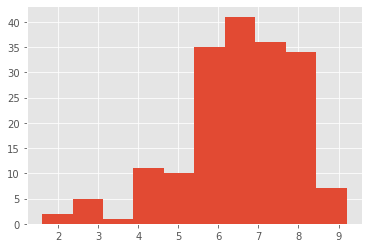

In [58]:
actual_df[actual_df['platform']=='XOne']['user_score'].hist()

<AxesSubplot:>

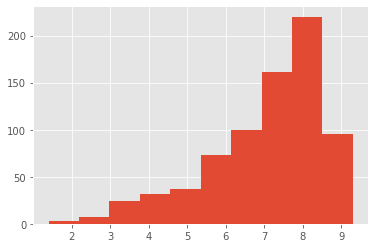

In [59]:
actual_df[actual_df['platform']=='PC']['user_score'].hist()

Распределения походят на нормальные.
Вычислим дисперсии для наших выборок

In [60]:
#Вычслим дисперисию для XOne
xone_variance=round(np.var(actual_df[actual_df['platform']=='XOne']['user_score'], ddof=1),2)
xone_variance

1.91

In [61]:
#Вычслим дисперисию для PC
pc_variance=round(np.var(actual_df[actual_df['platform']=='PC']['user_score'], ddof=1),2)
pc_variance

2.32

Из полученных выше данных мы можем заметить, что средние оценки пользователей и дисперсия на PC выше чем на XOne

Проверим гипотезу, при этом критический уровень статистической значимости будем использовать 0.05. Дисперсии выборок разные. Но они взяты из одной генеральной совокупности, параметр equal_val будем считать как True.

In [62]:
alpha=0.05

results = st.ttest_ind(actual_df[actual_df['platform']=='XOne']['user_score'].dropna(),
                       actual_df[actual_df['platform']=='PC']['user_score'].dropna())
#так как у нас данные из единой совокупности, примем equal_var = True

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 9.379956219356061e-06
Отвергаем нулевую гипотезу


**Вывод:**
Полученное значение p-value говорит о том, что хотя средние значения оценки пользователей PC и XOne - неодинаковы - очень низкая вероятность, что такое большое различие можно получить случайно. Мы можем делать вывод о значимом различии между средними оценками пользователей по этим платформам. Отвергаем нулевую гипотезу.

### Гипотеза о неравенстве пользовательских рейтингов жанров Action и Sports

Как мы знаем нулевая гипотеза должна строится с использованием знака равенства, тогда нулевая гипотеза будет звучать следующим образом:

Нулевая гипотеза - "Средняя пользовательские рейтинг жанров Action и Sports - равны".

Альтернативная гипотеза - "Средняя пользовательские рейтинг жанров Action и Sports - НЕ равны"

Проверим данные для Action и Sports

In [63]:
actual_df[actual_df['genre']=='Action']['user_score'].describe()

count   415.00
mean      6.95
std       1.32
min       2.00
25%       6.30
50%       7.30
75%       7.90
max       9.10
Name: user_score, dtype: float64

In [64]:
actual_df[actual_df['genre']=='Sports']['user_score'].describe()

count   132.00
mean      5.78
std       1.66
min       1.40
25%       4.75
50%       6.05
75%       7.00
max       9.00
Name: user_score, dtype: float64

Из полученных выше данных мы можем заметить, что средние оценки пользователей в жанре Action выше чем в жанре Sports

Проверим гипотезу, при этом критический уровень статистической значимости будем использовать 0.05

In [65]:
alpha=0.05

results = st.ttest_ind(actual_df[actual_df['genre']=='Action']['user_score'].dropna(), 
                       actual_df[actual_df['genre']=='Sports']['user_score'].dropna())
#так как у нас данные из единой совокупности, примем equal_var = True

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0839747510108565e-15
Отвергаем нулевую гипотезу


**Вывод:**
Полученное значение p-value говорит о том, что хотя средние значения оценки пользователей в жанрах Action и Sports - неодинаковы - очень низкая вероятность, что такое большое различие можно получить случайно. Мы можем делать вывод о значимом различии между средними оценками пользователей по этим жанрам.

## Вывод

Мы выявили определяющие успешность игры закономерности в различных регионах, а именно:

**Северная Америка:**

Следуют построить рекламный бюджет и стратегии вокруг стационарных платформ PS4 и XOne. 
Сосредоточится на Играх жанра Action и Shooter. 
Транслировать рекламу лучше для взрослой и подростковой аудитории (от 17 и от 13 лет соответственно).

**Европа:**

Следуют построить рекламный бюджет и стратегии вокруг стационарной платформы PS4 и персональными компьютерами. 
Сосредоточится на Играх жанра Action и Shooter. 
Транслировать рекламу лучше для взрослой и подростковой аудитории (от 17 и от 13 лет соответственно).


**Япония:**

Следуют построить рекламный бюджет и стратегии вокруг портативных платформ PSV и продуктов Nintendo. 
Сосредоточится на Играх жанра Role-playing и Action. 
Транслировать рекламу лучше для детской и подростковой аудитории (от 6 и от 13 лет соответственно). Но так же необходимо часть бюджета направить на взрослую аудиторию с детьми, так как дети не всегда принимают решения в какие игры им играть, так как оплачивают и принимают решения взрослые.

**Для всех регионов:**

Оценки критиков имеют более значимое влияние на суммарные продажи нежели оценки игроков. Такая зависимость наблюдается на всех популярных платформах. Но зависимость разнится от платформы к платформе. Для успеха рекламной компании необходимо следить за предварительной оценкой критиков выходящих продуктов, а так же на выставках и предпоказах и ранних демо-доступов.

Мы поняли, что успех среди пользователей на одной платформе не гарантирут успехов на другой, мы отвергли равенство средней оценки между консольной приставкой XOne и PC.